In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Load final_results
final_results = np.load('Phoenix-2014T_results.npy', allow_pickle=True).item()

# Extract BLEU and ROUGE scores
bleu_scores = final_results["metrics"]["bleu_scores"]
rouge_scores = final_results["metrics"]["rouge_scores"]
bert_scores = final_results["metrics"]["bert_scores"]
bleurt_scores = final_results["metrics"]["bleurt_scores"]

# # Separate scores based on index conditions
# same_index_bleu = {key: [] for key in ['bleu1', 'bleu2', 'bleu3', 'bleu4']}
# same_index_rouge = []
# different_index_bleu = {key: [] for key in ['bleu1', 'bleu2', 'bleu3', 'bleu4']}
# different_index_rouge = []

# Group indices
all_indices = list(bleu_scores.keys())
same_indices = [idx for idx in all_indices if idx[0] == idx[1]]
different_indices = [idx for idx in all_indices if idx[0] != idx[1]]

# Save or load random indices for consistent sampling
random_indices_file = "../random_indices.npy"

try:
    # Load saved random indices
    random_sample = np.load(random_indices_file, allow_pickle=True).tolist()
    print(f"Loaded {len(random_sample)} random indices from {random_indices_file}")
except FileNotFoundError:
    # Create and save random indices if not found
    random_sample = random.sample(different_indices, len(same_indices))
    np.save(random_indices_file, random_sample)
    print(f"Saved {len(random_sample)} random indices to {random_indices_file}")

# Function to collect BLEU and ROUGE scores
def collect_scores(indices, bleu_dict, rouge_dict, bert_dict, bleurt_dict):
    bleu = {key: [] for key in ['bleu1', 'bleu2', 'bleu3', 'bleu4']}
    rouge, bert, bleurt = [], [], []
    for idx in indices:
        idx = tuple(idx)
        for key in bleu:
            bleu[key].append(bleu_dict[idx][key])
        rouge.append(rouge_dict[idx])
        bert.append(bert_dict[idx])
        bleurt.append(bleurt_dict[idx])
    return bleu, rouge, bert, bleurt

# Collect scores for same and different indices
same_index_bleu, same_index_rouge, same_index_bert, same_index_bleurt = collect_scores(same_indices, bleu_scores, rouge_scores, bert_scores, bleurt_scores)
different_index_bleu, different_index_rouge, different_index_bert, different_index_bleurt = collect_scores(random_sample, bleu_scores, rouge_scores, bert_scores, bleurt_scores)

# Function to compute statistics
def compute_statistics(scores):
    return {
        'mean': np.mean(scores),
        'median': np.median(scores),
        'std_dev': np.std(scores),
        'range': np.ptp(scores),  # Range (max - min)
        'max': np.max(scores),
        'min': np.min(scores),
    }

# Compute and print statistics for BLEU and ROUGE scores
def print_statistics(stat_type, same_scores, different_scores):
    print(f"\n{stat_type} Statistics (Same Pairs):")
    for key in same_scores:
        print(f"{key.upper()}: {compute_statistics(same_scores[key])}")
    
    print(f"\n{stat_type} Statistics (Random Pairs):")
    for key in different_scores:
        print(f"{key.upper()}: {compute_statistics(different_scores[key])}")

print_statistics("BLEU", same_index_bleu, different_index_bleu)

print("\nROUGE Statistics (Same Pairs):")
print(compute_statistics(same_index_rouge))

print("\nROUGE Statistics (Random Pairs):")
print(compute_statistics(different_index_rouge))

print("\nBERT Statistics (Same Pairs):")
print(compute_statistics([item['bertscore_f1'] for item in same_index_bert]))

print("\nBERT Statistics (Random Pairs):")
print(compute_statistics([item['bertscore_f1'] for item in different_index_bert]))

print("\nBLEURT Statistics (Same Pairs):")
print(compute_statistics([item['bleurt_score'] for item in same_index_bleurt]))

print("\nBLEURT Statistics (Random Pairs):")
print(compute_statistics([item['bleurt_score'] for item in different_index_bleurt]))

Loaded 642 random indices from ../random_indices.npy

BLEU Statistics (Same Pairs):
BLEU1: {'mean': 52.968209780282756, 'median': 49.99999999999999, 'std_dev': 25.80793742750492, 'range': 94.44444444444449, 'max': 100.00000000000004, 'min': 5.555555555555555}
BLEU2: {'mean': 39.86414253321263, 'median': 34.424528717033205, 'std_dev': 30.76498984021422, 'range': 100.00000000000004, 'max': 100.00000000000004, 'min': 0.0}
BLEU3: {'mean': 30.683905485849973, 'median': 22.279781707648727, 'std_dev': 32.910025440272925, 'range': 100.00000000000004, 'max': 100.00000000000004, 'min': 0.0}
BLEU4: {'mean': 24.297374141654295, 'median': 0.0, 'std_dev': 33.500081133270555, 'range': 100.00000000000004, 'max': 100.00000000000004, 'min': 0.0}

BLEU Statistics (Random Pairs):
BLEU1: {'mean': 12.628608873318164, 'median': 11.111111111111109, 'std_dev': 6.974232915889484, 'range': 46.930963428066875, 'max': 47.368421052631575, 'min': 0.43745762456469894}
BLEU2: {'mean': 1.231557002541923, 'median': 0.0,

In [2]:
random_sample

[[555, 331],
 [641, 226],
 [40, 541],
 [298, 499],
 [583, 106],
 [341, 343],
 [627, 309],
 [586, 380],
 [330, 362],
 [65, 294],
 [469, 175],
 [594, 50],
 [190, 17],
 [156, 533],
 [250, 235],
 [550, 275],
 [433, 148],
 [82, 419],
 [103, 420],
 [521, 446],
 [188, 24],
 [324, 371],
 [456, 459],
 [361, 75],
 [219, 453],
 [141, 434],
 [41, 447],
 [508, 159],
 [399, 554],
 [154, 220],
 [534, 161],
 [615, 333],
 [186, 39],
 [556, 254],
 [534, 306],
 [248, 167],
 [22, 560],
 [306, 7],
 [33, 70],
 [260, 169],
 [102, 282],
 [112, 441],
 [449, 222],
 [369, 371],
 [161, 138],
 [571, 516],
 [505, 581],
 [262, 499],
 [267, 201],
 [209, 402],
 [549, 334],
 [103, 59],
 [110, 158],
 [85, 133],
 [297, 485],
 [156, 512],
 [49, 314],
 [127, 571],
 [35, 141],
 [513, 426],
 [494, 304],
 [83, 326],
 [12, 320],
 [166, 403],
 [587, 286],
 [257, 51],
 [219, 617],
 [23, 143],
 [489, 504],
 [112, 193],
 [638, 595],
 [238, 61],
 [27, 272],
 [257, 178],
 [212, 154],
 [485, 180],
 [461, 466],
 [25, 280],
 [603, 160]

In [3]:
bert_scores = final_results["metrics"]["rouge_scores"]
last_key, last_value = list(rouge_scores.items())[-1]
last_key

(641, 641)

In [4]:
import numpy as np
final_results = np.load('Phoenix-2014T_results.npy', allow_pickle=True).item()
bert_scores = final_results["metrics"]["bert_scores"]

# Get the last key-value pair
last_key, last_value = list(bert_scores.items())[-1]

print("Last Key:", last_key)
print("Last Value:", last_value)

Last Key: (641, 641)
Last Value: {'bertscore_precision': 90.6520128250122, 'bertscore_recall': 94.21727657318115, 'bertscore_f1': 92.40026473999023}


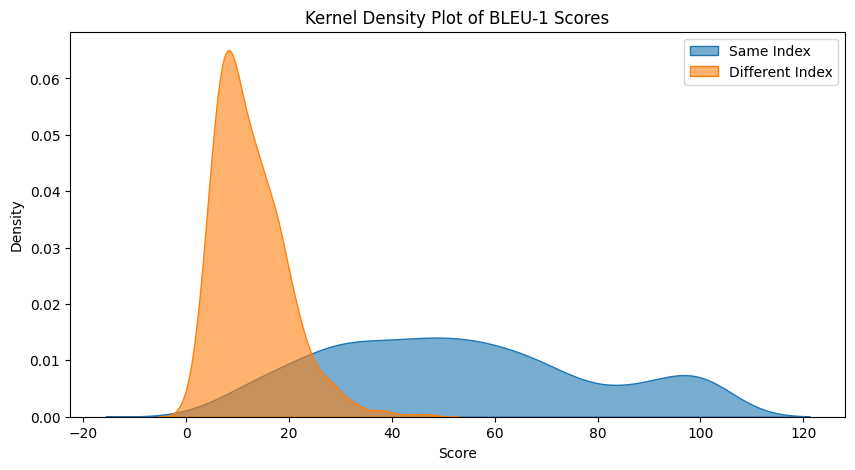

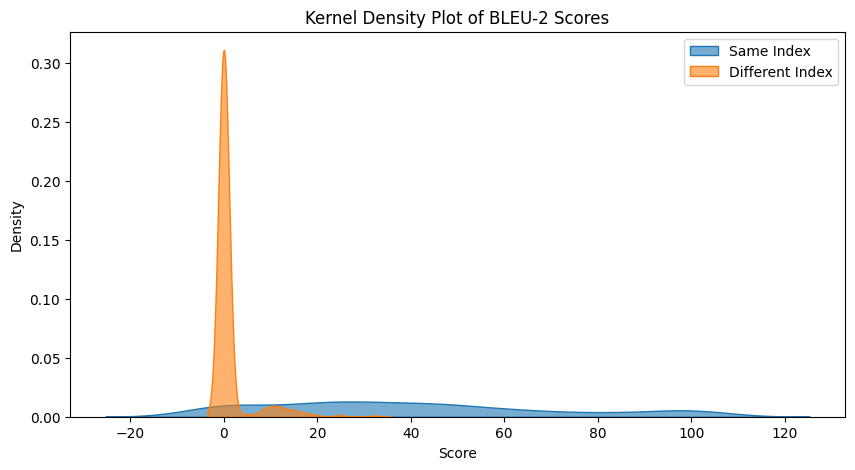

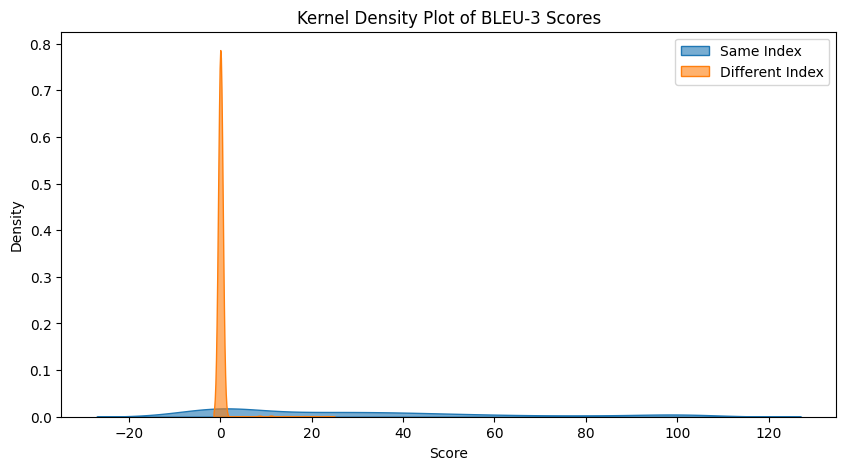

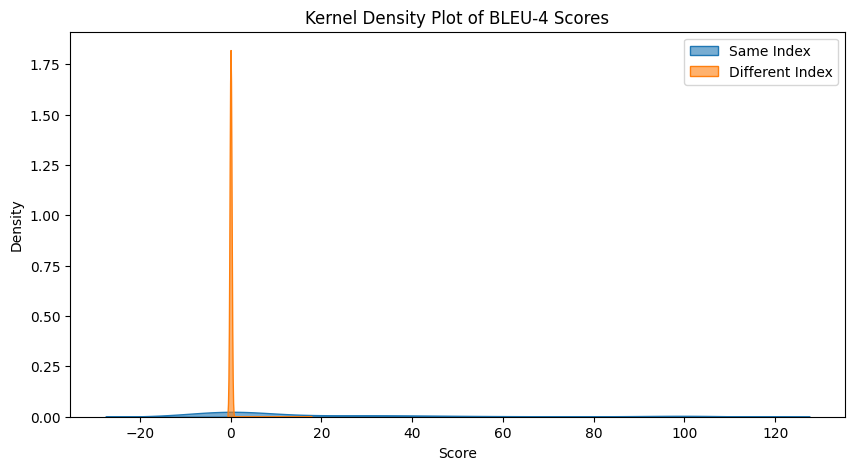

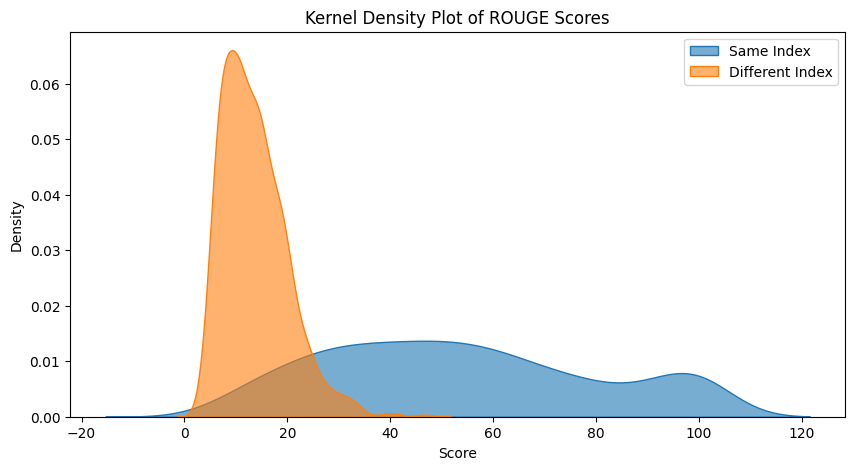

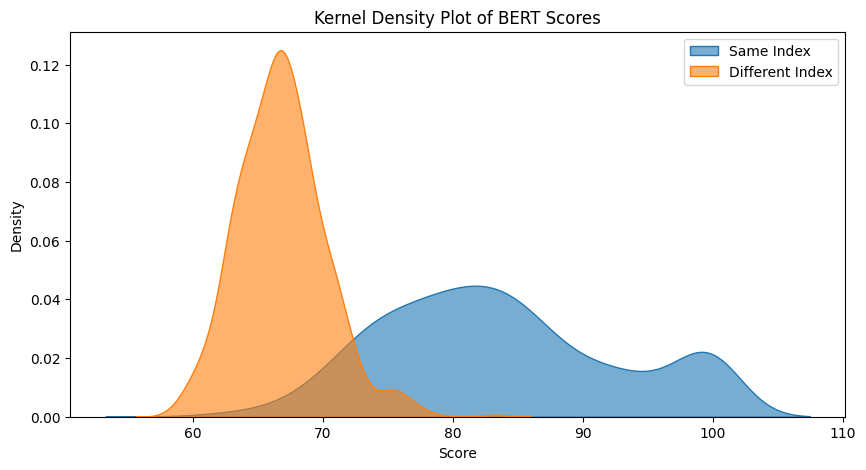

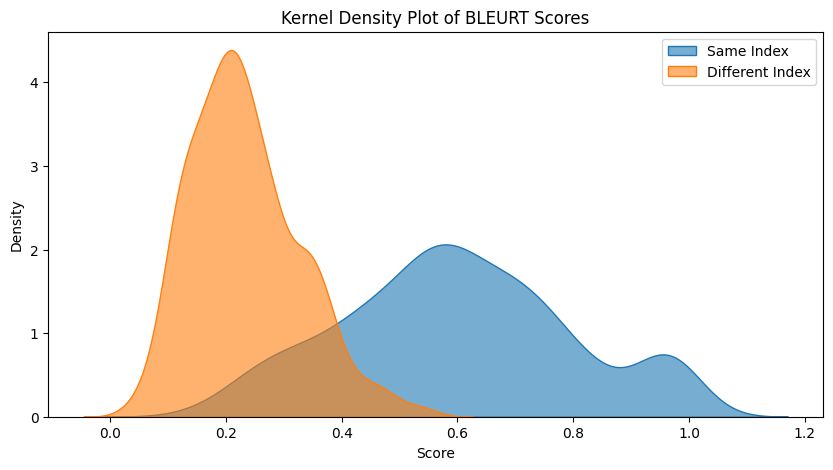

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_kde(data_same, data_different, label, xlabel="Score", ylabel="Density"):
    """
    Function to plot Kernel Density Estimation (KDE) for same and different index scores.
    
    Parameters:
    - data_same: Scores for same indices
    - data_different: Scores for different indices
    - label: The title label indicating the type of score (e.g., "BLEU-1")
    - xlabel: Label for the x-axis (default is "Score")
    - ylabel: Label for the y-axis (default is "Density")
    """
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data_same, label='Same Index', fill=True, alpha=0.6)
    sns.kdeplot(data_different, label='Different Index', fill=True, alpha=0.6)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Kernel Density Plot of {label} Scores')
    plt.legend()
    plt.show()

# Plot KDE for BLEU and ROUGE scores
plot_kde(same_index_bleu['bleu1'], different_index_bleu['bleu1'], label="BLEU-1")
plot_kde(same_index_bleu['bleu2'], different_index_bleu['bleu2'], label="BLEU-2")
plot_kde(same_index_bleu['bleu3'], different_index_bleu['bleu3'], label="BLEU-3")
plot_kde(same_index_bleu['bleu4'], different_index_bleu['bleu4'], label="BLEU-4")
plot_kde(same_index_rouge, different_index_rouge, label="ROUGE")
plot_kde([item['bertscore_f1'] for item in same_index_bert], [item['bertscore_f1'] for item in different_index_bert], label="BERT")
plot_kde([item['bleurt_score'] for item in same_index_bleurt], [item['bleurt_score'] for item in different_index_bleurt], label="BLEURT")

In [6]:
import numpy as np
final_results = np.load('Phoenix-2014T_results.npy', allow_pickle=True).item()
final_results.keys()

dict_keys(['Refs', 'Hyps', 'metrics'])

In [14]:
import pandas as pd

# Extract reference and hypothesis text for the same indices
refs = [list(final_results["Refs"].values())[idx[0]] for idx in same_indices if idx[0] < len(final_results["Refs"])]
hyps = [list(final_results["Hyps"].values())[idx[0]] for idx in same_indices if idx[0] < len(final_results["Hyps"])]

# hyps = [final_results["Hyps"][idx[0]] for idx in same_indices]

# Combine all scores into a dictionary for export
export_data = {
    "refs": refs,
    "hyps": hyps,
    "same_indices": same_indices,
    "random_indices": random_sample,
    "same_index_bleu1": same_index_bleu['bleu1'],
    "different_index_bleu1": different_index_bleu['bleu1'],
    "same_index_bleu2": same_index_bleu['bleu2'],
    "different_index_bleu2": different_index_bleu['bleu2'],
    "same_index_bleu3": same_index_bleu['bleu3'],
    "different_index_bleu3": different_index_bleu['bleu3'],
    "same_index_bleu4": same_index_bleu['bleu4'],
    "different_index_bleu4": different_index_bleu['bleu4'],
    "same_index_rouge": same_index_rouge,
    "different_index_rouge": different_index_rouge,
    "same_index_bert": [item['bertscore_f1'] for item in same_index_bert],
    "different_index_bert": [item['bertscore_f1'] for item in different_index_bert],
    "same_index_bleurt": [item['bleurt_score'] for item in same_index_bleurt],
    "different_index_bleurt": [item['bleurt_score'] for item in different_index_bleurt]
}

# Convert the data dictionary into a pandas DataFrame
df = pd.DataFrame({key: pd.Series(value) for key, value in export_data.items()})

# Save the DataFrame to a CSV file
output_file = "../signscore/bt_score_data.csv"
df.to_csv(output_file, index=False)
print(f"Data exported to {output_file}")

Data exported to ../signscore/bt_score_data.csv


In [14]:
export_data

{'refs': ['regen und schnee lassen an den alpen in der nacht nach im norden und nordosten fallen hier und da schauer sonst ist das klar .',
  'am donnerstag regen in der nordhälfte in der südhälfte mal sonne mal wolken ähnliches wetter dann auch am freitag .',
  'vom nordmeer zieht ein kräftiges tief heran und bringt uns ab den morgenstunden heftige schneefälle zum teil auch gefrierenden regen .',
  'sonnig geht es auch ins wochenende samstag ein herrlicher tag mit temperaturen bis siebzehn grad hier im westen .',
  'deutschland liegt morgen unter hochdruckeinfluss der die wolken weitgehend vertreibt .',
  'am sonntag im nordwesten eine mischung aus sonne und wolken mit einigen zum teil gewittrigen schauern .',
  'örtlich schauer oder gewitter die heftig sein können .',
  'in den nächsten tagen geht es auf jeden fall winterlich weiter immer wieder mal mit etwas schnee .',
  'und zum wochenende wird es dann sogar wieder ein bisschen kälter .',
  'auch morgen erwartet uns eine ruhige her

#### CSL-Daily results

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Load final_results
final_results = np.load('Csl-daily_results.npy', allow_pickle=True).item()

# Extract BLEU and ROUGE scores
bleu_scores = final_results["metrics"]["bleu_scores"]
rouge_scores = final_results["metrics"]["rouge_scores"]

# Separate scores based on index conditions
same_index_bleu1, same_index_bleu2, same_index_bleu3, same_index_bleu4 = [], [], [], []
same_index_rouge = []
different_index_bleu1, different_index_bleu2, different_index_bleu3, different_index_bleu4 = [], [], [], []
different_index_rouge = []

# Group scores
all_indices = list(bleu_scores.keys())
same_indices = [idx for idx in all_indices if idx[0] == idx[1]]
different_indices = [idx for idx in all_indices if idx[0] != idx[1]]

# Save or load random indices for consistent sampling
random_indices_file = "../../../csl-random_indices.npy"

try:
    # Try to load saved random indices
    random_sample = np.load(random_indices_file, allow_pickle=True).tolist()
    print(f"Loaded {len(random_sample)} random indices from {random_indices_file}")
except FileNotFoundError:
    # If the file doesn't exist, create random indices and save them
    random_sample = random.sample(different_indices, len(same_indices))
    np.save(random_indices_file, random_sample)
    print(f"Saved {len(random_sample)} random indices to {random_indices_file}")

# Collect BLEU and ROUGE scores for same indices
for idx in same_indices:
    same_index_bleu1.append(bleu_scores[idx]['bleu1'])  # Example: BLEU-1
    same_index_bleu2.append(bleu_scores[idx]['bleu2'])  # Example: BLEU-2
    same_index_bleu3.append(bleu_scores[idx]['bleu3'])  # Example: BLEU-3
    same_index_bleu4.append(bleu_scores[idx]['bleu4'])  # Example: BLEU-4
    same_index_rouge.append(rouge_scores[idx])

# Collect BLEU and ROUGE scores for different indices
for idx in random_sample:
    idx = tuple(idx)
    different_index_bleu1.append(bleu_scores[idx]['bleu1'])  # Example: BLEU-1
    different_index_bleu2.append(bleu_scores[idx]['bleu2'])  # Example: BLEU-2
    different_index_bleu3.append(bleu_scores[idx]['bleu3'])  # Example: BLEU-3
    different_index_bleu4.append(bleu_scores[idx]['bleu4'])  # Example: BLEU-4
    different_index_rouge.append(rouge_scores[idx])

# Create histograms for BLEU-1
plt.figure(figsize=(10, 5))
plt.hist(same_index_bleu1, bins=10, alpha=0.7, label='Same Index BLEU-1')
plt.hist(different_index_bleu1, bins=10, alpha=0.7, label='Different Index BLEU-1')
plt.title('Histogram of BLEU-1 Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create histograms for BLEU-2
plt.figure(figsize=(10, 5))
plt.hist(same_index_bleu2, bins=10, alpha=0.7, label='Same Index BLEU-2')
plt.hist(different_index_bleu2, bins=10, alpha=0.7, label='Different Index BLEU-2')
plt.title('Histogram of BLEU-2 Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create histograms for BLEU-3
plt.figure(figsize=(10, 5))
plt.hist(same_index_bleu3, bins=10, alpha=0.7, label='Same Index BLEU-3')
plt.hist(different_index_bleu3, bins=10, alpha=0.7, label='Different Index BLEU-3')
plt.title('Histogram of BLEU-3 Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create histograms for BLEU-4
plt.figure(figsize=(10, 5))
plt.hist(same_index_bleu4, bins=10, alpha=0.7, label='Same Index BLEU-4')
plt.hist(different_index_bleu4, bins=10, alpha=0.7, label='Different Index BLEU-4')
plt.title('Histogram of BLEU-4 Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create histograms for ROUGE
plt.figure(figsize=(10, 5))
plt.hist(same_index_rouge, bins=10, alpha=0.7, label='Same Index ROUGE')
plt.hist(different_index_rouge, bins=10, alpha=0.7, label='Different Index ROUGE')
plt.title('Histogram of ROUGE Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


PermissionError: [Errno 13] Permission denied: '../../../csl-random_indices.npy'

In [ ]:
import numpy as np
final_results = np.load('Csl-daily_results.npy', allow_pickle=True).item()
final_results

{'Refs': {'S001960_P0004_T00': '中国人民解放军在众寡悬殊的形势下，采取集中力量打歼灭战等战术，终于赢得了战争的胜利。',
  'S001960_P0005_T00': '中国人民解放军在众寡悬殊的形势下，采取集中力量打歼灭战等战术，终于赢得了战争的胜利。',
  'S001965_P0000_T00': '政府机关的改革，不但要精简多余的人员，更要减少重叠的机构。',
  'S001965_P0005_T00': '政府机关的改革，不但要精简多余的人员，更要减少重叠的机构。',
  'S001969_P0000_T00': '我国今年的进口减少了。',
  'S001975_P0000_T00': '家里生活条件好了，奶奶还保持着勤俭节约的好习惯。',
  'S001975_P0004_T00': '家里生活条件好了，奶奶还保持着勤俭节约的好习惯。',
  'S001978_P0000_T00': '水资源是宝贵的，我们要节约用水。',
  'S001978_P0005_T00': '水资源是宝贵的，我们要节约用水。',
  'S001981_P0000_T00': '他的母亲勤俭节约，把他们抚养长大。',
  'S001996_P0004_T00': '顺风行船本应该一帆风顺，可风太大了船也禁不起这份折腾。',
  'S001996_P0005_T00': '顺风行船本应该一帆风顺，可风太大了船也禁不起这份折腾。',
  'S002001_P0007_T00': '言必信，行必果，令行禁止，是我们这所学校师生言行的基本准则。',
  'S002004_P0000_T00': '军队没有严明的纪律和令行禁止的作风是不行的。',
  'S002004_P0005_T00': '军队没有严明的纪律和令行禁止的作风是不行的。',
  'S002007_P0000_T00': '公共场所，禁止吸烟。',
  'S002007_P0007_T00': '公共场所，禁止吸烟。',
  'S002009_P0000_T00': '我们不能拒绝别人的善意批评。',
  'S002009_P0005_T00': '我们不能拒绝别人的善意批评。',
  'S002018_P0005_T00': '她果然是深爱着另一个人，不然也不会拒绝你。',
  'S0